# IMDB MOVIES RECOMMENDER
#Name and Surname: Oğuzhan Samet TOLUNAY
#Number: 201011047

In [13]:
#Libraries and Property
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
#  Project Goal
#Recommender systems suggest relevant items to users by acquiring user preferences and exploiting them to build a type of 
#user model. The main purpose of such a system is to match the most suitable item for the constructed user model. And hence, 
#finding similar items for user preferences is the most crucial point of any recommender system. The state-of-art recommender
#systems suffer from handling the data sparsity problem. For this reason, the proposed recommender system combines content 
#information of movie features (cast, director, genre, etc.) with a collaborative filtering approach. The similarity scores of
#movie features are supplemented by a goal programming model in the content based approach. 


In [5]:
from IPython.display import Image
Image(url='https://1.bp.blogspot.com/-pkfX2XdrpX8/WJBdMrZ2ZjI/AAAAAAAADw4/kptOuCt_orMOSsOqLLHCx4ed_PYDm48VwCLcB/s640/SPLIT_RED-600x888.jpg')

In [ ]:
#Read File and show head
import pandas as pd
movies=pd.read_csv('imdb.csv')
movies.head()

In [4]:
#Rank count
movies.Rank.count()

1000

In [7]:
#Max votes
movies.Votes.max()

1791916

In [4]:
#Min metascore
movies[movies.Metascore==movies.Metascore.min()]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue (Millions),Metascore
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [24]:
#Enter a genre print head
x=str(input("Enter a genre: "))
movies[movies.Genre==x].head(10)

Enter a genre: Comedy


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue (Millions),Metascore
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
25,26,Paris pieds nus,Comedy,Fiona visits Paris for the first time to assis...,Dominique Abel,"Fiona Gordon, Dominique Abel,Emmanuelle Riva, ...",2016,83,6.8,222,NaN,NaN
28,29,Bad Moms,Comedy,When three overworked and under-appreciated mo...,Jon Lucas,"Mila Kunis, Kathryn Hahn, Kristen Bell,Christi...",2016,100,6.2,66540,113.08,60.0
30,31,Why Him?,Comedy,A holiday gathering threatens to go off the ra...,John Hamburg,"Zoey Deutch, James Franco, Tangie Ambrose,Cedr...",2016,111,6.3,48123,60.31,39.0
106,107,The Comedian,Comedy,A look at the life of an aging insult comic na...,Taylor Hackford,"Robert De Niro, Leslie Mann, Danny DeVito, Edi...",2016,120,5.4,1954,1.66,40.0
115,116,Office Christmas Party,Comedy,When his uptight CEO sister threatens to shut ...,Josh Gordon,"Jason Bateman, Olivia Munn, T.J. Miller,Jennif...",2016,105,5.8,30761,54.73,42.0
148,149,Superbad,Comedy,Two co-dependent high school seniors are force...,Greg Mottola,"Michael Cera, Jonah Hill, Christopher Mintz-Pl...",2007,113,7.6,442082,121.46,76.0
255,256,The Hangover,Comedy,Three buddies wake up from a bachelor party in...,Todd Phillips,"Zach Galifianakis, Bradley Cooper, Justin Bart...",2009,100,7.8,611563,277.31,73.0
266,267,Dirty Grandpa,Comedy,"Right before his wedding, an uptight guy is tr...",Dan Mazer,"Robert De Niro, Zac Efron, Zoey Deutch, Aubrey...",2016,102,6.0,75137,35.54,18.0
278,279,Everybody Wants Some!!,Comedy,"In 1980, a group of college baseball players n...",Richard Linklater,"Blake Jenner, Tyler Hoechlin, Ryan Guzman,Zoey...",2016,117,7.0,36312,3.37,83.0


In [6]:
#Using median minutes and mean rating
minutes=movies.Runtime.median()
rating=movies.Rating.mean()
print("median minutes:",minutes)
print("average rating:",rating)

median minutes: 111.0
average rating: 6.723200000000003


In [29]:
#Runtime and Year histogram graphic
movies[['Runtime','Year']].hist()

Rank                     500.500
Year                    2014.000
Runtime                  111.000
Rating                     6.800
Votes                 110799.000
Revenue (Millions)        47.985
Metascore                 59.500
Name: 0.5, dtype: float64

In [8]:
#Movies data describe
movies.describe()

,Rank,Year,Runtime,Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [9]:
#Runtime and metascore correlation
movies[['Runtime','Metascore']].corr()

,Runtime,Metascore
Runtime,1.000000,0.211978
Metascore,0.211978,1.000000


In [10]:
#Displays the name of scoring movies with equal or higher than the user's entered imdb score.

x=float(input("Enter a rating scores: "))
a=movies[(movies['Rating']>x)|(movies['Rating']==x)].Title
print(a)

Enter a rating scores: 7.9
0                           Guardians of the Galaxy
6                                        La La Land
12                                        Rogue One
16                                    Hacksaw Ridge
18                                             Lion
19                                          Arrival
21                            Manchester by the Sea
26                          Bahubali: The Beginning
33                                         Deadpool
35                       Captain America: Civil War
36                                     Interstellar
50       Star Wars: Episode VII - The Force Awakens
54                                  The Dark Knight
64                                     The Prestige
67                               Mad Max: Fury Road
74                                         Zootopia
76                                     The Avengers
77                             Inglourious Basterds
80                                   

In [58]:
#Displays the imdb score of the movie name that the user has entered.

y=str(input("Enter a film name: "))
a=movies[movies['Title']==y].Rating
print(a)

Enter a film name: Split
2    7.3
Name: Rating, dtype: float64


In [11]:
movies.shape

(1000, 12)

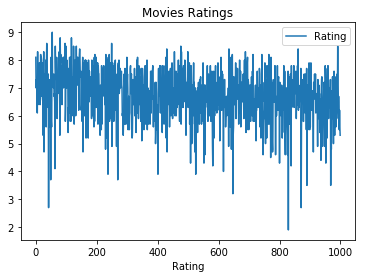

In [14]:
plt.plot([x for x in range(len(movies.Rating))], movies.Rating, label='Rating')
plt.xlabel('Rating')
plt.title("Movies Ratings")
plt.legend()
plt.show()

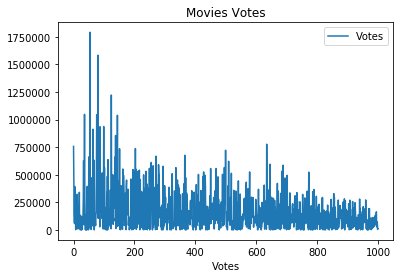

In [15]:
plt.plot([x for x in range(len(movies.Votes))], movies.Votes, label='Votes')
plt.xlabel('Votes')
plt.title("Movies Votes")
plt.legend()
plt.show()

In [30]:
movies.corr()

,Rank,Year,Runtime,Rating,Votes,Revenue (Millions),Metascore
Rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.271592,-0.191869
Year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.126790,-0.079305
Runtime,-0.221739,-0.164900,1.000000,0.392214,0.407062,0.267953,0.211978
Rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.217654,0.631897
Votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.639661,0.325684
Revenue (Millions),-0.271592,-0.126790,0.267953,0.217654,0.639661,1.000000,0.142397
Metascore,-0.191869,-0.079305,0.211978,0.631897,0.325684,0.142397,1.000000


In [47]:
#Find quantile metascores
a=float(input("Enter a quantile number for metascore?(0-1 between)"))
movies['Metascore'].quantile(a)

Enter a quantile number for metascore?(0-1 between)0.35


52.0

In [66]:
#Number of movies types
s = movies.apply(lambda x: pd.Series(x['Genre']),axis=1).stack().reset_index(level=1, drop=True)
s = s.value_counts()
s[:5]

Action,Adventure,Sci-Fi    50
Drama                      48
Comedy,Drama,Romance       35
Comedy                     32
Drama,Romance              31
dtype: int64